<a href="https://colab.research.google.com/github/TUIlmenauAMS/GVT_Lecture_Colab/blob/main/GVT_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lecture Fundamentals of Video Technology**

## Gerald Schuller

## Gerald.schuller@tu-ilmenau.de


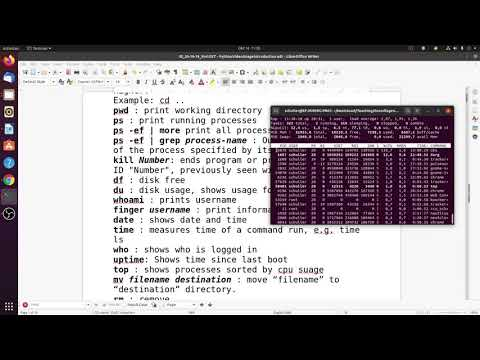

In [ ]:
from IPython.display import YouTubeVideo
YouTubeVideo('hqcHX6jv8Qo')

Link to lecture video: https://www.youtube.com/watch?v=hqcHX6jv8Qo&list=PL5QfKiTKGyftEnq7897DaLHRvFtg2VT1M&index=2

##**Python Video/Image Introduction**

####common Linux console Commands:
“**man**” Command : manual pages (explanation) for „command“.
Example: man cd

**cd** : changes directory, "/" : root directory, "." : current directory, „..“ : one directory higher.
Example: cd ..

**pwd** : print working directory

**ps** : print running processes

**ps -ef | more** print all processes page by page

**ps -ef | grep process-name** : Outputs the details of the process specified by its name.

**kill Number**: ends program or process with process ID "Number", previously seen with ps.

**df** : disk free

**du** : disk usage, shows usage for directories

**whoami** : prints username

**finger username** : print information about username

**date** : shows date and time

**time** : measures time of a command run, e.g. time ls

**who** : shows who is logged in

**uptime**: Shows time since last boot

**top** : shows processes sorted by cpu suage

**mv *filename* destination** : move “filename” to “destination” directory.  

**rm** : remove

**mkdir** : makes directory

**cat** : concatenate, output the contents of a file

**more** : shows an input or file one page at a time, more filename, or from input e.g.: ls | more

**xterm** : start x-terminal

**which command** : shows path to command

**shutdown now** : shuts down computer now

**vi** : visual editor: terminal based editor. commands:esc: commmand mode, in command mode: :w write, :q quit, x delete character, i insert in write mode (enter text) 

**ssh** : secure shell, e.g. ssh servername 

**man** : manual pages, e.g. man ssh

**cp** : copy a file or directory, e.g. cp filename directory, original is kept, unlike with „mv“.

**scp** : secure copy, between networked machines, e.g. scp . user@remotemachine.edu:dir 

**chmod** : change mode: change access rights for files or directories. To make a file executable: chmod ug+x file. User and group get the right to execute the file.

**ifconfig** : show network data like ip address 

**sox** : audio tools, e.g. command "play" 

**wget** : copy entire website trees

**Debugging** is an essential part of programming. An essential strategy for this is: divide the program into several simple functions with known input/output relationship, and then test them separately.

#**Image Processing**
In the console window install python3-opencv (if not already done). This is the so-called Open Computer Vision Library:

    import cv2

####Interesting commands in ipython --pylab:

help(name of function)  or function name: 
help function for the command

Example:

    help(sin)

####Useful commands:

    cv2.imread, for reading JPEG images from a file, 

    cv2.imwrite, for writing JPEG images in a file,

    cv2.imshow, for plotting images from arrays,

imshow, (From the library matplotlib.pyplot already loaded by --pylab, potential name conflict!)

####**Example:**
Take a photo with our python script „**imagerecdisp.py**“ with command line:

    python3 imagerecdisp.py

Then we start Python, import cv2, and read Photo with:

    import cv2
    photo=cv2.imread('pycolorphoto.jpg');

We can see the size of image with „shape“:

    print("Photo dimensions:",photo.shape)

    ('Photo dimensions:', (480, 640, 3))


Here, 480 and 640 are the number of pixels in the image ,vertically and horizontally. The number “3” comes from the 3 primary colors red, green and blue (RGB). Note that Python OpenCV stores it in the order “BGR”. That means, “0” is blue, “1” is green and “2” is red.


Here we can have access to the individual pixels, e.g. the Pixel at position 0,0 has a proportion of the primary color blue from:
photo[0,0,0]

  88
  
The "88" is an intensity value, which is between 0 and 255 for images (corresponding to 8 bits unsigned integer per primary color intensity value).

We can represent the image in the matrix ortensor ”photo" with the command:

    cv2.imshow('Photo',photo)

To display the image we need:

    cv2.waitKey(1000)

1000 means: The image is displayed for 1000ms, and then the key-press from the keyboard is queried.

The following shows the display of the blue component intensity value of the image:

    cv2.imshow('Blue-component',photo[:,:,0])

    cv2.waitKey(1000)


#**Video processing**

The OpenCV library also gives us the possibility to stream data directly from a webcam in computer, such as with the Raspberry Pi!

For this purpose, the command is:

    cap = cv2.VideoCapture(0) 

This accesses the default camera 0, which is for example an inserted USB webcam."Cap" contains a pointer to the address of this camera.
We can read a frame of this stream as:

    [retval, frame] = cap.read()

where "retval" is a return value (it says if everything is fine), and "frame" contains the 
obtained frame.

With

    cv2.imshow('frame',frame)

we can display this frame in a window.

With the following function,

    cv2.waitKey(..)

the **window** is **opened** by cv2.imshow (it does not open without waitKey) and remains open until a keypress event is prompted by waitKey function. The function cv2.waitkey waits for a key event, and it is only active if the corresponding window is active. Only when this window is active, cv2.waitKey responds to keyboard input!
When we do this in an infinite loop, we get the live video of the camera displayed in the window. A sample program for this is:

In [ ]:
#@title Videostream (please run this first)
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import html
from base64 import b64decode, b64encode
import cv2
import numpy as np
import PIL
import io

def jsob_to_image(js_object):
  # decode base64 image
  image_bytes = b64decode(js_object.split(',')[1])
  # convert bytes to numpy array
  img_array = np.frombuffer(image_bytes, dtype=np.uint8)
  # convert numpy array into OpenCV BGR 
  frame = cv2.imdecode(img_array, flags=1)

  return frame

#JavaScript code to get the stream
def video_stream():
  js = Javascript('''
    var video;
    var div = null;
    var stream;
    var captureCanvas;
    var imgElement;
    var labelElement;
    
    var pendingResolve = null;
    var shutdown = false;
    
    function removeDom() {
       stream.getVideoTracks()[0].stop();
       video.remove();
       div.remove();
       video = null;
       div = null;
       stream = null;
       imgElement = null;
       captureCanvas = null;
       labelElement = null;
    }
    
    function onAnimationFrame() {
      if (!shutdown) {
        window.requestAnimationFrame(onAnimationFrame);
      }
      if (pendingResolve) {
        var result = "";
        if (!shutdown) {
          captureCanvas.getContext('2d').drawImage(video, 0, 0, 640, 480);
          result = captureCanvas.toDataURL('image/jpeg', 0.8)
        }
        var lp = pendingResolve;
        pendingResolve = null;
        lp(result);
      }
    }
    
    async function createDom() {
      if (div !== null) {
        return stream;
      }
      div = document.createElement('div');
      div.style.border = '2px solid black';
      div.style.padding = '3px';
      div.style.width = '100%';
      div.style.maxWidth = '600px';
      document.body.appendChild(div);
      
           
      video = document.createElement('video');
      video.style.display = 'block';
      video.width = div.clientWidth - 6;
      video.setAttribute('playsinline', '');
      video.onclick = () => { shutdown = true; };
      stream = await navigator.mediaDevices.getUserMedia(
          {video: { facingMode: "environment"}});
      div.appendChild(video);
      imgElement = document.createElement('img');
      imgElement.style.position = 'absolute';
      imgElement.style.zIndex = 1;
      imgElement.onclick = () => { shutdown = true; };
      div.appendChild(imgElement);
      
      const instruction = document.createElement('div');
      instruction.innerHTML = 
          '<span style="blue: red; font-weight: bold;">' +
          'click here to stop the video</span>';
      div.appendChild(instruction);
      instruction.onclick = () => { shutdown = true; };
      
      video.srcObject = stream;
      await video.play();
      captureCanvas = document.createElement('canvas');
      captureCanvas.width = 640; 
      captureCanvas.height = 480; 
      window.requestAnimationFrame(onAnimationFrame);
      
      return stream;
    }
    async function stream_frame() {
      if (shutdown) {
        removeDom();
        shutdown = false;
        return '';
      }
      var preCreate = Date.now();
      stream = await createDom();
      
      var preShow = Date.now();
  
            
      
      var preCapture = Date.now();
      var result = await new Promise(function(resolve, reject) {
        pendingResolve = resolve;
      });
      shutdown = false;
      
      return {'create': preShow - preCreate, 
              'show': preCapture - preShow, 
              'capture': Date.now() - preCapture,
              'img': result};
    }
    ''')

  display(js)
  
def video_frame():
  data = eval_js('stream_frame()')
  return data

# Get the webcam stream and forward it to python 
video_stream()

while True:
    frame_js = video_frame()
    if not frame_js:
        break
    img = jsob_to_image(frame_js["img"])


<IPython.core.display.Javascript object>

In [ ]:
from google.colab.patches import cv2_imshow

cap = video_stream()
#if the error "name 'video_stream' is not defined" occurs, please run the videostream code cell above first and try again

#while True:
    #frame_js = video_frame()
    #if not frame_js:
      #break
    #img = jsob_to_image(frame_js["img"])
    # Display the resulting frame
cv2_imshow(img)

    #if cv2.waitKey(20) & 0xFF == ord('q'):
        #break


Corresponding to the code above is the "videorecdisp.py" file available on moodle. You can download it and then call it from console window/terminal of your computer with:

    python videorecdisp.py

and we obtain the live video. End the video display by pressing “q”.

A practical usage is e.g. a "pipe camera" with goose-neck for the pipes inspection.

The following example captures an image of the live video from our camera:

In [ ]:
import cv2

#Program to capture an image from a camera and display it live on the screen

cap = video_stream()

#while True:
    #frame_js = video_frame()
    #if not frame_js:
        #break
    #img = jsob_to_image(frame_js["img"])
    # Display the resulting frame
cv2_imshow(img)
cv2.imwrite('pycolorphoto.jpg', img)

#if cv2.waitKey(1) & 0xFF == ord('q'):
#break


The photo captured by the code above is saved as a file name *pycolorphoto.jpg* in the folder tab on the left. To see the file, click on the folder tab (📁) on the left. 

Corresponding to the code above is the file "imagerecdisp.py" available on moodle. You can download it and start it with:

    python imagerecdisp.py

Immediately after the start the photo is shot and displayed. The display will be terminated with "q".

The following example shows the contents of the top left pixel of the video when the program is started:

In [ ]:
import cv2

#Program to capture an image from a camera and display the pixel value on the screen

cap = video_stream()

# Capture one frame
while True:
    frame_js = video_frame()
    if not frame_js:
        break
    img = jsob_to_image(frame_js["img"])

print("image format: ", img.shape)
print("pixel 0,0: ",img[0,0,:])

<IPython.core.display.Javascript object>

image format:  (480, 640, 3)
pixel 0,0:  [133 151 162]


Save it as "pyimageshowpixel.py" and start it with:

python  pyimageshowpixel.py

Output:

('image format: ', (480, 640, 3))
('pixel 0,0: ', array([ 35, 167, 146], dtype=uint8))


Note that we had only addressed the pixel position, so only first 2 indices: frame [0,0 ,:].

The **colon** ":" means that all indices of this dimension (i.e., indices for intensities of B,G,R)  are addressed.

In this way, we could also address an index range, by **Start:End**, e.g, 0:3 addresses the indices 0,1,2 (Note: not the End value, 3). In this case, the above mentioned notation i.e., frame[0,0,:] is identical to:
frame[0,0,0:3]

As output, we get not only a value, but an array with the values of the 3 primary colors, in the order BGR. "Red" here has the value 146, Green 167, and Blue 35.
We also see that the number representation is "uint8", which means: unsigned integer with 8 bits, that is, a number between 0 and 255 (= 28−1 ).  


With the following program we can analyze the R, G, and B components as video in separate windows:

In [ ]:
import numpy as np
import cv2

#Program to capture a video from a camera and display Original and R,G,B, components live on the screen

cap = video_stream()

#cv2.namedWindow('Original')
#cv2.namedWindow('B component')
#cv2.namedWindow('G component')
#cv2.namedWindow('R component')

#while(True):
    # Capture frame-by-frame
    #frame_js = video_frame()
    #if not frame_js:
        #break
    #img = jsob_to_image(frame_js["img"])

    # Display the resulting frame
print('Original')
cv2_imshow(img)
print('B Komponente')
cv2_imshow(img[:,:,0])
print('G Komponente')
cv2_imshow(img[:,:,1])
print('R Komponente')
cv2_imshow(img[:,:,2])
 
    #if cv2.waitKey(1) & 0xFF == ord('q'): 
        #break 


Corresponding to the code above is the file *videorecdispRGB.py* on moodle. You can download it and start it in console window with: 

    python videorecdispRGB.py

**Note**: The colors belonging to the respective component (R, G, B) appear lighter in the corresponding video.

Here we can see: Each pixel requires an information content of 3 bytes (byte = 8bit). We have 480x640 pixels, that is, 307200 pixels per frame. If we have 25 frames per second, we get about 307200 * 25 * 3 * 8 bits per second (b/s), ie 184320000 b/s, about 184 Mb/s! This is significantly more than most Internet connections offer, let alone for wireless transmission.

We should think, for a (wireless) transmission, how we **reduce** the necessary **bitrate**.
A simple method is to transmit only **black and white video** content instead of color content which brings a bitrate reduction by a factor of 3. 

In order to produce the correct brightness impression, we must take into account the relative, different sensitivity of the human eye to the 3 primary colors. By empirical examination of the subjective brightness the following relation was obtained for the primary colors R, G, B:

$$0.299; 0.587; 0.114$$

We see: The eye is most sensitive to the primary color green, followed by red, and significantly less to blue.

So if we weight the primary color values of our video, we get a matching black and white image. Its brightness value is denoted by Y:

$$Y = 0.299 * R + 0.587 * G + 0.114 * B$$

Note: Since the sum of the 3 factors is equal to 1, Y has the same range of values as R, G, B.


**Python example** to compute the so-called “Luminance” component Y, the brightness, or the Black/White version of image. For comparison is the „Green“ component is also displayed:

    python videorecprocy.py

In this script the Y component is computed with:

    Y=(0.114 * frame[: , : , 0] + 0.587 * frame[: , : , 1] + 0.299 * frame[: , : , 2]) / 255;

**Note**: We can simply **multiply a frame by a float value**. The division at the end is expected to normalize to the value range of 0..1, the Python is expected at float values for the frame.

**Note**: Y best reproduces the human brightness impression, the green component is a certain approximation of it.

However a black/white transmission is not very satisfactory. So how can we transfer **color** with a relatively **low bit-rate**?

How many pixels do we need for a good quality display?

To answer these questions, we must look at the **properties of the eye**.


#**Audio Processing**
In the console window install **python3-pyaudio** (if not already done):

*sudo apt install python3-pyaudio*

This allows python access to the sound card or device. The following program is an example of how to record audio from the microphone and store it into a file named in the argument,

*python3 pyrecaudiofile.py test.wav*

Important parameters are:

- CHUNK = 1024 #Blocksize, number of audio samples read from the sound card at once.

- WIDTH = 2 #2 bytes per audio sample, or 16 bits.

- CHANNELS = 1 # number of audio channels, 1 for mono, 2 for stereo

- RATE = 16000  #Sampling Rate in Hz or audio samples per second


The next program is an example of how to read an audio signal from a wav file, named in the argument, and played back through the sound device,

    python3 pyplayfile test.wav

#Python Example for audio recording

Following is a code which allow us to record the sound from the computer microphone for 5 seconds and save it under the name *audio.wav*

In [ ]:
#@title Audio recording
# all imports
from IPython.display import Javascript
from google.colab import output
from base64 import b64decode


RECORD = """
const sleep  = time => new Promise(resolve => setTimeout(resolve, time))
const b2text = blob => new Promise(resolve => {
  const reader = new FileReader()
  reader.onloadend = e => resolve(e.srcElement.result)
  reader.readAsDataURL(blob)
})
var record = time => new Promise(async resolve => {
  stream = await navigator.mediaDevices.getUserMedia({ audio: true })
  recorder = new MediaRecorder(stream)
  chunks = []
  recorder.ondataavailable = e => chunks.push(e.data)
  recorder.start()
  await sleep(time)
  recorder.onstop = async ()=>{
    blob = new Blob(chunks)
    text = await b2text(blob)
    resolve(text)
  }
  recorder.stop()
})
"""

def record(sec=5): #sec = length of the recording
  display(Javascript(RECORD))
  s = output.eval_js('record(%d)' % (sec*1000))
  b = b64decode(s.split(',')[1])
  with open('audio.wav','wb') as f:
    f.write(b)
  return 'audio.wav'  

record()

To play the recorded sound, we can use the following command:

In [13]:
import IPython.display as ipd

ipd.Audio('audio.wav')

#Python Example for a chirp sound
Follow code is an example from Multirate Signal processing lecture. It creates a chirp sound from the given paramteters.

In [1]:
import numpy as np
from scipy import signal
import cv2
import IPython.display as ipd

# Signal Processing Parameters
NFFT = 2**16  # Number of FFT points
Fs = 32000   # Sampling frequency,
T=1/Fs       # Sampling Time
t = np.arange(NFFT)*T # Time vector

# Sweeping Sinusoid
sweep = signal.chirp(t, f0=0, f1=0.5*Fs, t1=2**16*T, method='linear')

# Listen to Chirp
ipd.Audio(sweep, rate=Fs)